# TMA4320 Introduksjon til vitenskapelige beregninger



# Liten git guide

## NB husk cell-> All output ->clear

åpne cmd
bruk cd (change directory) for å åpne mappen (>>cd FILPLASSERING)
for å 'pushe' (laste opp endringer du har gjort):
- git add FILNAVN  ( prosjekt3.ipynb)
- git commit -m "her kan du skive en liten commit meliding"
- git pull  
- git push


# 2 Exercises

## 2.1 

Vis at 

$$ 
\begin{align}
  \tilde{\phi}(x,t)=\frac{1}{\sqrt{4 \pi D t}} e^{- \frac{(x-\mu)^2 }{4 D t}}
\end{align} 
$$

hvor D er en konstant oppfyller difusjonsligningen 

$$
\begin{align}
\frac{\partial \phi (x,t) }{\partial t}= D \frac{\partial^2 \phi (x,t)}{\partial x^2}.
\end{align}
$$


La oss først se på den tidsderiverte av $\tilde{\phi}$
$$
\begin{align}
\frac{\partial \tilde{\phi} (x,t)}{\partial t} &=\frac{\partial}{\partial t}\frac{1}{\sqrt{4 \pi D t}} e^{- \frac{(x-\mu)^2 }{4 D t}} \\
&=  \Big ( \frac{\partial}{\partial t} \frac{1}{\sqrt{4 \pi D t}} \Big )  e^{- \frac{(x-\mu)^2 }{4 D t}}
+ \frac{1}{\sqrt{4 \pi D t}}  \Big ( \frac{\partial}{\partial t}  e^{- \frac{(x-\mu)^2 }{4 D t}} \Big )  \\
&=\frac{1}{\sqrt{4 \pi D t}}e^{- \frac{(x-\mu)^2 }{4 D t}}\Big[ \frac{-1/2}{t} + \frac{(x-\mu)^2}{4 D t^2} \Big].
\end{align}
$$

Vidre ser vi på den dobbelt deriverte mhp. x. 
$$
\begin{align}
 \frac{\partial^2 \tilde{\phi} (x,t)}{\partial x^2} &=\frac{\partial^2 }{\partial x^2} \frac{1}{\sqrt{4 \pi D t}} e^{- \frac{(x-\mu)^2 }{4 D t}}  \\
&= \frac{\partial}{\partial x} \Big ( \frac{-2 (x-mu)}{4 D t}  \frac{1}{\sqrt{4 \pi D t}}  e^{- \frac{(x-\mu)^2 }{4 D t}} \Big )\\
&= \frac{1}{\sqrt{4 \pi D t}}  e^{- \frac{(x-\mu)^2 }{4 D t}} \Big[   
\frac{-2}{4 D t} + \frac{4 (x-\mu)^2}{4^2 D^2 t^2}
\Big]
\end{align}
$$

Det kan nå lett ses at høyreside av diffusjonsligningen blir
$$
\begin{align}
D \frac{\partial^2 \tilde{\phi} (x,t)}{\partial x^2} =\frac{1}{\sqrt{4 \pi D t}}e^{- \frac{(x-\mu)^2 }{4 D t}}\Big[ \frac{-1/2}{t} + \frac{(x-\mu)^2}{4 D t^2} \Big],
\end{align}
$$
som er lik den tidseriverte av $\tilde{\phi}$ og dermed at funskjonen oppfyller diffusjonsligningen.  


////////////////////////////////////
HUSK: 
- tilde over phi 
- sjekk om det finnes en bedre måte å skrive e^x på 
- husk å sjekke komma og punktum 

## 2.2
### 2.2.1

La D være en konstant og start med partikkeldistrubisjonen 
$$
\begin{align}
\phi(x,0)=\delta (x-x_0).
\end{align}
$$

Her kan vi bruke at 

$$
\begin{align}
\delta (x-x_0) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{-ik(x-x_0)}dk.
\end{align}
$$

Det gir at

$$
\begin{align}
\frac{\partial}{\partial t}\phi(x,t) \big |_{t=0} &= D \frac{\partial^2}{\partial x^2} \phi (x,t') \big |_{t'=0} = D \phi \frac{\partial^2}{\partial x^2}(x,0) \\
&=D \frac{\partial^2}{\partial x^2} \delta(x-x_0)  \\
&= D \frac{1}{2\pi} \frac{\partial^2}{\partial x^2} \int_{-\infty}^{\infty} e^{-ik(x-x_0)}dk \\
&= D (-ik)^2  \frac{1}{2\pi}  \int_{-\infty}^{\infty} e^{-ik(x-x_0)}dk  \\
&= -Dk^2 \phi (x,0)
\end{align}
$$

Dette gir at for hver gang $\phi$ tidsderiveres detter ut faktor $-Dk^2$. 

Dette kan generaliseres til at 
$$
\begin{align}
\big ( \frac{\partial}{\partial t} \big )^{n} \phi (x,t) \big |_{t=0} = (-Dk^2)^n \phi(x,t)
\end{align}
$$

For å finne $\phi(x,t)$ kan vi så se på Taylor utvikling av funskjonen. 


Dette kan brukes i taylor utviklingen

$$
\begin{align}
\phi (x,t) &= \phi (x,0) + \sum_{n=1}^{\infty} \frac{t^n}{n!} \frac{\partial^n 
\phi(x,t')}{\partial t'^n } 
\Big |_{t'=0}    \\
&=\phi(x,0)+ \sum_{n=1}^{\infty} \frac{ (-Dk^2t)^n}{n!} \phi(x,0) \\
&= \phi (x,0) e^{-Dk^2t}  \\
&= \frac{1}{2 \pi} \int_{- \infty}^{\infty} e^{-Dk^2t}e^{-ik(x-x_0}) dk
\end{align}
$$

En måte å løse dette integralet på er Fourier trasnformasjon. 
$$
\begin{align}
\hat{f}(w)= \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} f(z)  e^{-iwz}dz.
\end{align}
$$

Legg merke til at vis vi bytter variabler slik at $w=\tilde{x}=x-x_0$ og $z=k$, og lar $f$ også være avhengig av $t$ får vi
$$
\begin{align}
\hat{f}(\tilde{x},t)= \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} f(k,t)  e^{-i\tilde{x}k}dk.
\end{align}
$$

Ved å sette $f(k,t)=\frac{1}{\sqrt{2\pi}} e^{-Dtk^2}$ får vi 
$$
\phi(x,t)= \hat{f}(\tilde{x},t)= \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} f(k,t)  e^{-i\tilde{x}k}dk.
$$

# kilde her????
Det er kjent at   
$$
\begin{align}
f(x)=e^{-ax^2} \Longleftrightarrow \hat{f}(w)=\frac{1}{\sqrt{2a}}e^{-\frac{w^2}{4a} }. 
\end{align}
$$

Ved sammenligning ser vi da at 
$$
\begin{align}
\phi(x,t) &= \hat{f}(\tilde{x},t)= \frac{1}{\sqrt{2\pi}} \frac{1}{\sqrt{2Dt}} e^{-\frac{\tilde{x}^2}{4Dt}}
= \frac{1}{\sqrt{4\pi Dt}} e^{-\frac{(x-x_0)^2}{4Dt}}
\end{align}
$$



### 2.2.2

Ved å studere resultatet fra oppgave 2.2.1 kan det ses at $D$ påvirker størrelsen av faktoren $4Dt$, og at den derfor vil si noe om hvor raskt systemet ender seg. Ved t=0 ser man at det kun er i $x=x_0$ at eksponenten er 0 og at uttrykket går mot $\infty$, for alle andre $x\neq x_0$ går eksponeneten mot $-\infty$ og utrykket mot 0. Dette skjer kun ved $t=0$, for t=0 ser man at uttrykket endrer seg slik at $\phi(x,t)$ flater seg ut. 

$\phi(x,t)$ fra oppgave 2.2.1 er en normalfordeling der variansen $\sigma^2=4Dt$. Variansen sier noe om spredningen av partikklene, slik at $D$ sier noe om hvor raskt spredningen endres. Jo større $D$ jo raskere spres partikklene. 

### 2.2.3 



# Oppgave 3

I koden nedenfor simuleres "random walk" i 1D. Dette gjøres ved å for hvert tidsintervall $\Delta t$ bestemme tilfeldig om en partikkel skal gå et steg til venstre eller ett steg til høyre. Her er det antatt at alle steg er like lange $h=1$, og partikkelen må gå enten til høyre, eller til venstre og kan ikke stå i ro. 

## Kodeforklaring 

For å velge om en partikkel går mot høyre eller venstre brukes funskjonen generateRandomStep() som tar inn sannmsynligheten, P, for at en partikkel går mot venstre. Denne er generell og brukes i senere oppgaver, men i denne oppgaven setter P= 0.5, slik at begge retninger er like sannsynlig. Funksjonen genererer et tilfeldig flytall mellom null og én ved bruk av funsksjonen random() fra random biblioteket. Funksjonen returnener -1 om der tilfeldige tallet er mindre enn P, og 1 om det er større.

Funskjonen randomParticlePosition() tar inn sannsynligheten for at en partikkel beveger seg mot venstre og antall steg per partikkel, n. Funkjsonen lar partikkelen starte i pos=0 og ved hjelp av generateRandomStep() plusser den på eller trekker fra 1 for hvert tilfeldige sted. Etter n antall steg returneres posisjonen. 

Alle partiklene slippes i i punktet $x=0$. Funksjonen plotMultipleParticlePos tar inn antall partikler, n, som skal slippes og hvor mange steg, t (hvor mange tidsintervall), hver av partiklene skal ta. I funskjonen oprettes en hvor sluttposisjonen til hver partikkel skal lagres. For hver partikkel brukes til funskjonen randomPariclePosition til å finne en tilfeldig posisjon for hver partikkel, basert på forklaringen ovenfor, og denne posisjonen lagres så i listen med posisjoner. Til slutt plottes posisjonene i et histogram, slik at høyden på hver søyle representerer andel partikkler. 

In [1]:
#Hvordan skal vi normere? må vi gjøre noe med både x-verdiene og y-verdiene?
#Skjedde mye rart da jeg skulle prøve å plotte med normalfordeling i samme plot...
#får ikke til å skalere


import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math


"""hjelpefunksjon for plotting av histogram"""

def plotParameters(posList):
    numOfPos=round(max(posList)-min(posList))+1 
    if numOfPos%2==0:
        numOfBins=numOfPos//2
        hmin=min(posList)-0.5
        hmax=max(posList)+0.5
    else: 
        numOfBins=numOfPos//2+1
        hmin=min(posList)-1.5
        hmax=max(posList)+0.5
    return  numOfBins, hmin, hmax
    


n=1000  #antall partikler
t=100   #antall tidssteg

#returnerer -1 for skritt mot venstre, og 1 for skritt mot høyre
#P er sannsynligheten for skritt mot venstre (for å kunne bruke i alle oppgaver)
def generateRandomStep(P): 
    randomNumber=random.random()
    if randomNumber<=P:
        return -1
    else:
        return 1

#returnerer 1 partikkels posisjon etter t tilfeldige skritt
def randomParticlePosition(t,P): 
    pos=0
    for i in range(t):
        step=generateRandomStep(P)
        pos+=step
    return pos

#plotter tilfeldige posisjoner for n antall partikler
#Kan bare ende på partall antall steg,så kan evt bare plotte dette (ikke odetall, blir da kurve ikke brått opp og ned graf)
def plotMultipleParticlesPos(n,t):
    listOfPositions=[]
    for i in range(n):           #for n partikler
        pos=randomParticlePosition(t,0.5)   #finner posisjon til partikkelen
        listOfPositions.append(pos)
    xList = np.arange(min(listOfPositions),max(listOfPositions),1)    
 
    #Skalerer listen, fordi total sannsynlighet må jo være 1

    parameters=norm.fit(listOfPositions) #normalfordeling tilpasset dataene
    print(parameters)
    fitted_pdf = norm.pdf(xList,loc = parameters[0],scale = parameters[1])
    
  
    numberOfBins, hmin, hmax = plotParameters(listOfPositions) 
    plt.plot(xList,fitted_pdf,"red",label='tilpasset normalfordeling') #normalfordelingskurve
    plt.hist(listOfPositions,density=True,bins=numberOfBins,range=(hmin,hmax),label='simulert partikkelfordeling')  #plotter dataene
    plt.title("Figur 1: Random walk i 1D med V=0")
    plt.ylabel("Andel partikkler")
    plt.xlabel("x")
    plt.legend()
    plt.show()
    #print(fitted_pdf)
        
plotMultipleParticlesPos(n,t)



(-0.298, 10.231871578552967)


<Figure size 640x480 with 1 Axes>

FIGUR 1: Figuren viser et histogram av andel partikkler per posisjon etter simulert  "random walk" i 1D. Den røde grafen viser normalfordeling best mulig tilpasset parikkelenes posisjon. 

## Forklaring av resultat 

Figur 1 viser hvordan fordelingen av parikler ble etter simlasjonen kjørt ovenfor. Det kan ses at fordelingen til partiklene til en viss grad stemmer overnens med den tilpassede normalfordelingen. Noen

# Oppgave 5 

In [2]:
import scipy.constants

k=0.05*scipy.constants.eV #hva skal vi sette denne?
T0=273+37
kb=scipy.constants.k
beta=1/(kb*T0) #??
h=1 #skrittlengde
t=100
n=1000

#Definerer potensialene

def V1(x):
    return k*x

def V2(x):
    if x>-3*h or x<3*h:
        return k
    else:
        return 0
    
def V3(x):
    if x<-3*h:
        return -k
    elif x>3*h:
        return k
    else:
        return k*(-1+2*((x+3*h)/6*h))
    
     
    
def plotParticlePositionInPotential(k,beta,h,n,t,V):
    xList=[]
    for x in range(-100,100): #liste for posisjon
        xList.append(x)
    posList=[0]*2*t      #liste for antall partikler per posisjon
    for i in range(n):#for n partikler
        pos=0
        for j in range(t): #t antall skritt
            PdivP=math.exp(-beta*(V(pos-h)-V(pos+h)))
            P=PdivP/(1+PdivP)
   
            #if j%10==0:
                #print(P)
            step=generateRandomStep(P)
            pos+=step
        #print(pos)
        #print(len(posList))
        #print(pos+100)
        posList[pos+100]+=1 #legger til en til partikkel på posisjonen
    #Skalerer listen, fordi total sannsynlighet må jo være 1
    scaledPosList= [i/sum(posList) for i in posList]
    #print(scaledPosList)
    plt.xlim=(-50,50)
    plt.plot(xList,scaledPosList,"red")  #plotter dataene
    plt.show()

## 5.1

2.3364429142421445e+20


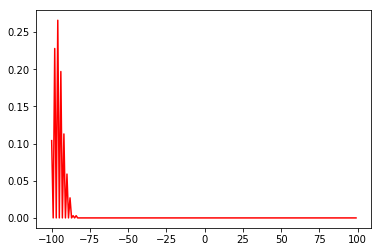

In [3]:
print(beta)

plotParticlePositionInPotential(k,beta,h,n,t,V1)


## 5.2

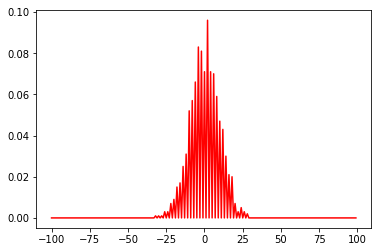

In [4]:

plotParticlePositionInPotential(k,beta,h,n,t,V2)

## 5.3 

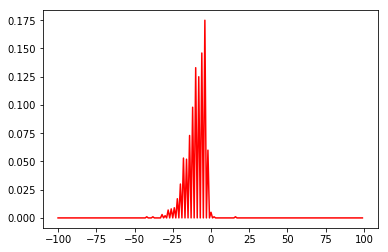

In [5]:
plotParticlePositionInPotential(k,beta,h,n,t,V3)

# Oppgave 7

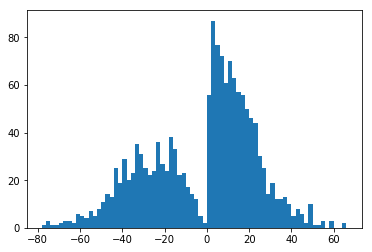

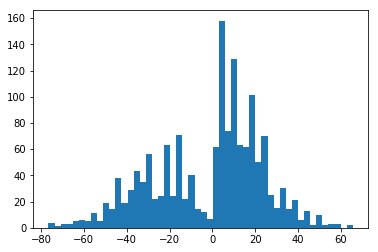

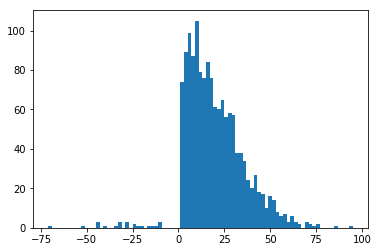

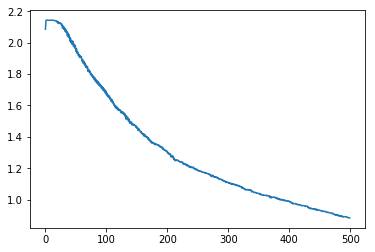

In [191]:
#HUSK. If a particle reaches the
#system edges, it can only move into the system in the next time step.


h=1
dt=1
L=50
Cc=0.07*scipy.constants.e*scipy.constants.N_A     ##*10**6 M står for mol og ikke Mega

t=1000




V0=1/beta 
V0_Na=V0 
V0_K=V0

x0=L/4
t0=0
NaB0=1450  #skriver B for utenfor cellen, og A for innenfor
KB0=50
NaA0=60
KA0=1400


def V_Na1(x,Vt):                                                              ##litt usikker på verdier her 
    if x>=-h and x<=h:
        return V0_Na+(Vt/2-(Vt/(2*h))*x)  #lineær overgang mellom utsiden og innsiden    
    elif x<-h:
        return Vt
    else:
        return 0

    
def V_K1(x,Vt):
    if x>=-h and x<=h:
        return V0_K+(Vt/2-(Vt/(2*h))*x)
    elif x<-h:
        return Vt
    else:
        return 0
    

def randomWalkPotential(V_Na,V_K,V0): #hvilke parametere bør tas inn?
    NaPos=[-x0]*NaB0+[x0]*NaA0  #liste over posisjon til hver Na-partiklene
    #legger til riktig antall utenfor og inni cellen
    KPos=[-x0]*KB0+[x0]*KA0   #liste over posisjon til hver K-partikkel
    tList=np.arange(0,t,1)   #liste med tidsverdier
    #QB=KB0+NaB0  #ladning utenfor    
    
    
    #ladning inni cellen (ved start):
    QA=KA0+NaA0#husk at hver partikkel representerer 0.1mM                                      #antall partikler på innsiden 
    #Q_plus=abs(QA-QB)
    
    #antall K- og Na- partikler utenfor og innenfor cellen
    KA=KA0
    NaA=NaA0
    KB=KB0   #trengs disse egt? tror de er konstante
    NaB=NaB0
    
    VtList=[]                
    
    #plt.hist(NaPos,bins=50)
    #plt.show()
    #plt.hist(KPos,bins=50)
    #plt.show()
    
    for i in range(t):
        #regner ut potensialet V(t)
        #Vt=QA/Cc*scipy.constants.e
        #Vt=partIn*0.1e-3*scipy.constants.eV              ##bruker dette istedet, partIn= antall partikkler på insiden, se hint oppg 7.1 
        #Vt=partIn*0.1*0.001/0.07
        
        Vt=(QA*0.0001*scipy.constants.N_A)/Cc
        
        VtList.append(Vt)   
        
        #print("Vt",Vt,"partIn",partIn)
        #print(NaPos)
        
        #Na-partiklene:
        for j in range(len(NaPos)):
                try:
                    PdivP_Na=math.exp(-beta*(V_Na(NaPos[j]-h,Vt)-V_Na(NaPos[j]+h,Vt))) #Hvilket potensial skal her?
                except: 
                    print(":(")
                    print("beta:",beta,"V_Na(NaPos[j]-h,Vt):",V_Na(NaPos[j]-h,Vt),"V_Na(NaPos[j]+h,Vt):",V_Na(NaPos[j]+h,Vt))
                    print("NaPos[j]+h",NaPos[j]+h)
                P_Na=PdivP_Na/(1+PdivP_Na)
                step=generateRandomStep(P_Na)
                NaPos[j]+=step
        
        #For K-partiklene
        for k in range(len(KPos)):
                try:
                    PdivP_K=math.exp(-beta*(V_K(KPos[k]-h,Vt)-V_K(KPos[k]+h,Vt))) 
                except:
                    print("feil i for k in range(len(KPos)) ")
                P_K=PdivP_K/(1+PdivP_K)
                step=generateRandomStep(P_K)
                KPos[k]+=step

        
        #regner ut antall partikler inni cellen
        KA=0    #la på dette
        NaA=0   #og dette"
        #print(KPos)
        
        #for å finne ut total ladning inni cellen
        for K in KPos:
            if K<-h:
                KA+=1       #pluss i stedet for minus er det ikke
                #print("hei")
        #print(NaPos)
        #print(QA)
        for Na in NaPos:
            #print(Na)
            if Na<-h:
                NaA+=1      #pluss i stedet for minus er det ikke
                #print("hei")
        QA=(KA+NaA)
        partIn=KA+NaA
        
        #print(QA)
        #print(Q_plus)
        #print(KA,NaA)
        
        #if (t%50==0):
             #plt.hist(NaPos,bins=50)
             #plt.show()
             #plt.hist(KPos,bins=50)
             #plt.show()
                
  

        
    
    numOfBinsNa, hmin, hmax = plotParameters(NaPos) 
    plt.hist(NaPos,bins=numOfBinsNa,range=(hmin,hmax))
    plt.show()
        
    
    numOfBinsK, hmin, hmax =plotParameters(KPos)
    plt.hist(KPos,bins=numOfBinsK,range=(hmin,hmax))
    plt.show()
    
   
    
    plt.plot(tList,VtList)
    #print(Vt)

    

randomWalkPotential(V_Na1,V_K1)
        


oppgave 7.2

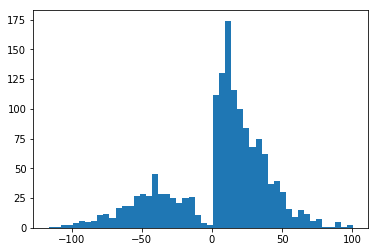

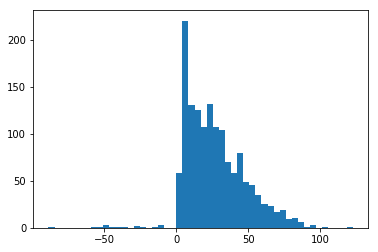

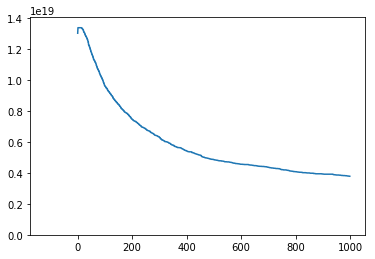

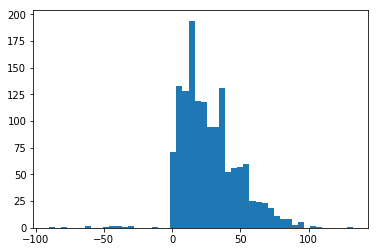

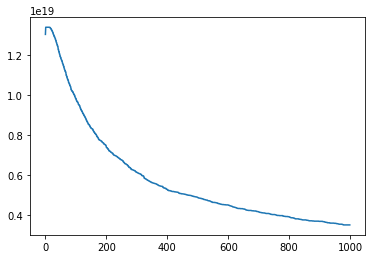

In [27]:
V01=1/beta #det er verdien over brøkstreken som viser hva beta ganger V0K og V0Na er
#og det er jo de oppgaven oppgir verdier vi skal sette dem.
V02=10/beta

randomWalkPotential(V_Na1,V_K1,V01)

randomWalkPotential(V_Na1,V_K1,V02)